[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slitvinov/dcomex-framework/blob/master/notebook/analysis.ipynb)

In [1]:
%%sh
if ! test -f .clone
then git clone --depth 1 --quiet https://github.com/slitvinov/dcomex-framework &&
     : > .clone
fi

In [5]:
import glob
import math
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET

In [6]:
def fix_time(time):
    t = 0
    n = len(time)
    ans = [0]
    for i in range(n - 1):
        dt = time[i + 1] - time[i]
        if i > 0 and not math.isclose(dt, prev):
            t += prev
        else:
            t += dt
        ans.append(t)
        prev = dt
    return ans

def read(path):
    root = ET.parse(path)
    params = [
        float(root.find('./Parameters/' + key).text)
        for key in ("k1", "mu", "svTumor")
    ]
    root = ET.parse(os.path.join(os.path.dirname(path), "MSolveOutput-x.xml"))
    time, volume = zip(
        *[[float(t.get("time")), float(t.text)]
          for t in root.findall("./TumorVolumes/TumorVolume")])
    return params, fix_time(time), volume
D = [
    read(path)
    for path in glob.glob("dcomex-framework/notebook/1/*/MSolveInput.xml")
]

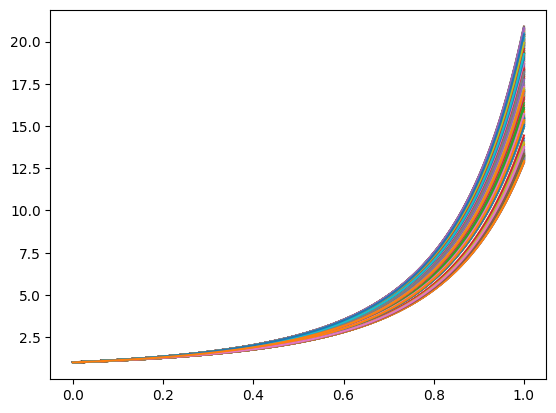

In [12]:
for (k1, mu, sv, *rest), time, volume in D:
    plt.plot([t / time[-1] for t in time], [v / volume[0] for v in volume])